In [ ]:
!pip install PyMuPDF nltk networkx matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 60.1 MB/s eta 0:00:00


In [ ]:
import fitz  # PyMuPDF
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
import itertools


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
uploaded = files.upload()
pdf_name = list(uploaded.keys())[0]
pdf_path = "/content/" + pdf_name
pdf_path


Saving journalfashion,+document+(6)+(1).pdf to journalfashion,+document+(6)+(1).pdf


'/content/journalfashion,+document+(6)+(1).pdf'

In [ ]:
doc = fitz.open(pdf_path)
text = ""

for page in doc:
    text += page.get_text()

doc.close()

print(text[:1000])


Indarti / Journal of Fashion and Textile Design Unesa 1 (2020) 128-137 
 
 
128 
 
 
METODE PROSES DESAIN DALAM PENCIPTAAN PRODUK FASHION  
DAN TEKSTIL 
Indarti 
Pendidikan Kesejahteraan Keluarga, Fakultas Teknik, Universitas Negeri Surabaya,  indarti@unesa.ac.id 
 
BAJU 
 
 
 
 
 
 
 
 
 
 
 
 
Abstrak 
Proses desain sering digunakan dalam metode penciptaan desain produk secara umum maupun 
dalam bidang desain mode, yang telah dipublikasi oleh jurnal-jurnal internasional sejak 1900an 
hingga saat ini. Proses desain telah dieksplorasi di banyak disiplin ilmu, termasuk desain interior, 
teknik, perencanaan lingkungan arsitektur, tekstil dan pakaian. Tujuan penulisan artikel ini adalah 
menyajikan macam-macam metode proses desain dalam bidang  desain mode yang telah dimuat 
di jurnal internasional ranking Q1 dan Q2 berdasarkan Scimago Journal & Country Rank. Dari 
hasil review diperoleh tiga macam metode proses desain, metode pertama yaitu kerangka 
konseptual desain pakaian, tiga tahap 

In [ ]:
nltk.download('punkt_tab')
stop_words = set(stopwords.words("english"))  # ganti "indonesian" jika perlu

sentences = sent_tokenize(text)

cleaned_sentences = []

for s in sentences:
    tokens = word_tokenize(s.lower())
    tokens = [
        w for w in tokens
        if w.isalpha() and w not in stop_words and len(w) > 1
    ]
    cleaned_sentences.append(tokens)

cleaned_sentences[:3]


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[['indarti',
  'journal',
  'fashion',
  'textile',
  'design',
  'unesa',
  'metode',
  'proses',
  'desain',
  'dalam',
  'penciptaan',
  'produk',
  'fashion',
  'dan',
  'tekstil',
  'indarti',
  'pendidikan',
  'kesejahteraan',
  'keluarga',
  'fakultas',
  'teknik',
  'universitas',
  'negeri',
  'surabaya',
  'indarti',
  'baju',
  'abstrak',
  'proses',
  'desain',
  'sering',
  'digunakan',
  'dalam',
  'metode',
  'penciptaan',
  'desain',
  'produk',
  'secara',
  'umum',
  'maupun',
  'dalam',
  'bidang',
  'desain',
  'mode',
  'yang',
  'telah',
  'dipublikasi',
  'oleh',
  'internasional',
  'sejak',
  'hingga',
  'saat',
  'ini'],
 ['proses',
  'desain',
  'telah',
  'dieksplorasi',
  'di',
  'banyak',
  'disiplin',
  'ilmu',
  'termasuk',
  'desain',
  'interior',
  'teknik',
  'perencanaan',
  'lingkungan',
  'arsitektur',
  'tekstil',
  'dan',
  'pakaian'],
 ['tujuan',
  'penulisan',
  'artikel',
  'ini',
  'adalah',
  'menyajikan',
  'metode',
  'proses',
  'desain'

In [ ]:
sentences_ngram = []

for tokens in cleaned_sentences:
    unigrams = tokens
    bigrams = [f"{tokens[i]}_{tokens[i+1]}" for i in range(len(tokens)-1)]
    sentences_ngram.append(unigrams + bigrams)

sentences_ngram[:2]


[['indarti',
  'journal',
  'fashion',
  'textile',
  'design',
  'unesa',
  'metode',
  'proses',
  'desain',
  'dalam',
  'penciptaan',
  'produk',
  'fashion',
  'dan',
  'tekstil',
  'indarti',
  'pendidikan',
  'kesejahteraan',
  'keluarga',
  'fakultas',
  'teknik',
  'universitas',
  'negeri',
  'surabaya',
  'indarti',
  'baju',
  'abstrak',
  'proses',
  'desain',
  'sering',
  'digunakan',
  'dalam',
  'metode',
  'penciptaan',
  'desain',
  'produk',
  'secara',
  'umum',
  'maupun',
  'dalam',
  'bidang',
  'desain',
  'mode',
  'yang',
  'telah',
  'dipublikasi',
  'oleh',
  'internasional',
  'sejak',
  'hingga',
  'saat',
  'ini',
  'indarti_journal',
  'journal_fashion',
  'fashion_textile',
  'textile_design',
  'design_unesa',
  'unesa_metode',
  'metode_proses',
  'proses_desain',
  'desain_dalam',
  'dalam_penciptaan',
  'penciptaan_produk',
  'produk_fashion',
  'fashion_dan',
  'dan_tekstil',
  'tekstil_indarti',
  'indarti_pendidikan',
  'pendidikan_kesejahteraan

In [ ]:
cooccur = defaultdict(int)

for tokens in sentences_ngram:
    unique_tokens = set(tokens)
    for w1, w2 in itertools.combinations(sorted(unique_tokens), 2):
        cooccur[(w1, w2)] += 1

list(cooccur.items())[:10]


[(('abstrak', 'abstrak_proses'), 1),
 (('abstrak', 'baju'), 1),
 (('abstrak', 'baju_abstrak'), 1),
 (('abstrak', 'bidang'), 1),
 (('abstrak', 'bidang_desain'), 1),
 (('abstrak', 'dalam'), 1),
 (('abstrak', 'dalam_bidang'), 1),
 (('abstrak', 'dalam_metode'), 1),
 (('abstrak', 'dalam_penciptaan'), 1),
 (('abstrak', 'dan'), 1)]

In [ ]:
G = nx.Graph()

for (w1, w2), weight in cooccur.items():
    G.add_edge(w1, w2, weight=weight)

print("Node:", G.number_of_nodes())
print("Edge:", G.number_of_edges())


Node: 2981
Edge: 106975


In [ ]:
pagerank = nx.pagerank(G, weight='weight')
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)


In [ ]:
top_keywords = sorted(
    pagerank.items(),
    key=lambda x: x[1],
    reverse=True
)[:20]

for i, (word, score) in enumerate(top_keywords, 1):
    print(f"{i}. {word} -> {score:.4f}")


1. dan -> 0.0101
2. yang -> 0.0099
3. desain -> 0.0099
4. proses -> 0.0063
5. dalam -> 0.0061
6. design -> 0.0057
7. untuk -> 0.0057
8. pada -> 0.0048
9. tahap -> 0.0048
10. metode -> 0.0046
11. pakaian -> 0.0043
12. ini -> 0.0042
13. proses_desain -> 0.0041
14. dengan -> 0.0034
15. dari -> 0.0033
16. journal -> 0.0030
17. masalah -> 0.0030
18. produk -> 0.0029
19. model -> 0.0028
20. fashion -> 0.0028


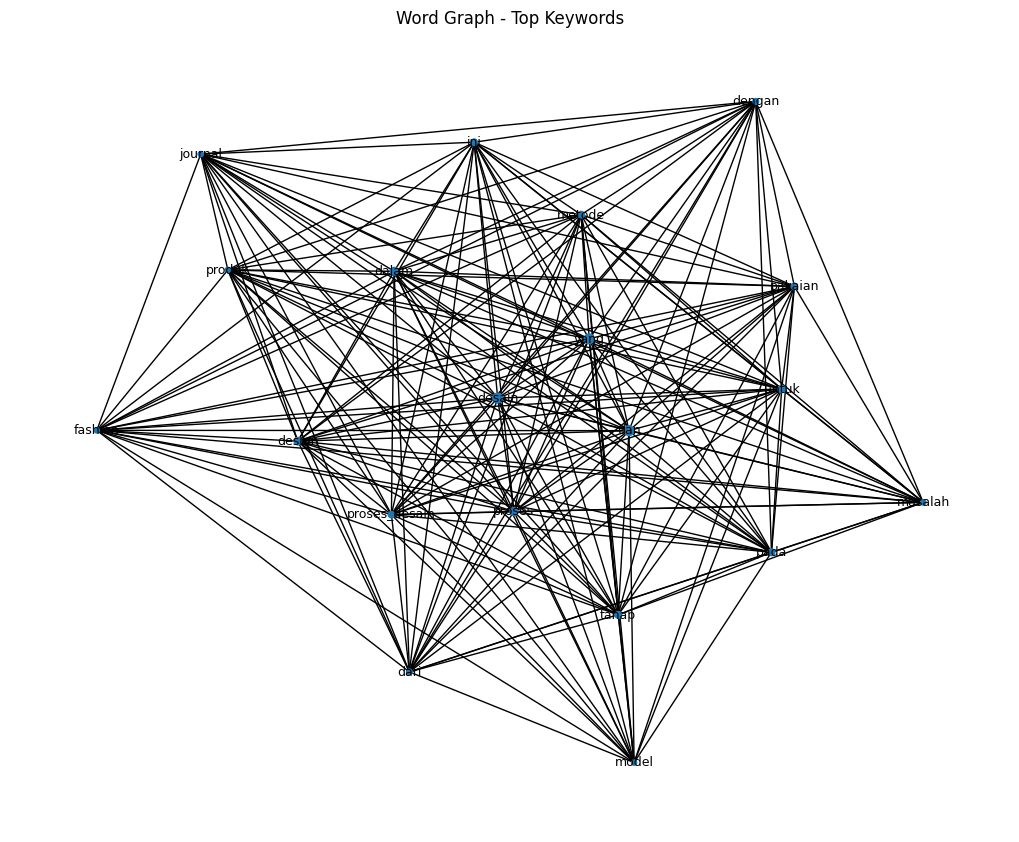

In [ ]:
top_nodes = [w for w, _ in top_keywords]
H = G.subgraph(top_nodes)

plt.figure(figsize=(10,8))
pos = nx.spring_layout(H, seed=42)

sizes = [pagerank[n] * 5000 for n in H.nodes()]

nx.draw(
    H, pos,
    with_labels=True,
    node_size=sizes,
    font_size=9
)

plt.title("Word Graph - Top Keywords")
plt.show()
